In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!pip install fastapi
!pip install pydentic
!pip install pyngrok
!pip install unicorn
!pip install fastapi nest-asyncio pyngrok uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 127.5 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok
import nest_asyncio
import uvicorn
from inspect import Parameter
from itertools import count
from typing import Any, Dict
from urllib.request import Request
from fastapi import Body,FastAPI,Request
from matplotlib.pyplot import text
from pydantic import BaseModel, Field as PydanticField
from pydantic.fields import Field

In [ ]:
app =FastAPI()

@app.post('/')
async def home(info: Request):
    req_info = await info.json()
    print()
    intent_NAme = req_info["queryResult"]["intent"]["displayName"]
    input = req_info["queryResult"]["queryText"]

    text = "The best 5 books are:"
    if(intent_NAme=="hello" or  intent_NAme == "Default Fallback Intent" or intent_NAme=="user" ):
      print(input)
      x = [x[0] for x in get_predictions(int(input))]
      text+= ' , '.join(x)
    elif (intent_NAme=="cant understand"):
       text ="None"

    return {"fulfillmentMessages": [
      {
        "text": {
          "text": [
            text
          ]
        }
      }
    ]}

In [ ]:
import pandas as pd

books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

In [ ]:
print("Books Dataset Shape:", books.shape)
print("Users Dataset Shape:", users.shape)
print("Ratings Dataset Shape:", ratings.shape)

Books Dataset Shape: (271360, 8)
Users Dataset Shape: (278858, 3)
Ratings Dataset Shape: (1149780, 3)


In [ ]:
print("\nBooks Info:")
print(books.info())
print("\nUsers Info:")
print(users.info())
print("\nRatings Info:")
print(ratings.info())


Books Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

Users Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: 

In [ ]:
print("\nMissing Values in Books:\n", books.isnull().sum())
print("\nMissing Values in Users:\n", users.isnull().sum())
print("\nMissing Values in Ratings:\n", ratings.isnull().sum())


Missing Values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing Values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64

Missing Values in Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [ ]:
print("\nBooks Sample:\n", books.head())
print("\nUsers Sample:\n", users.head())
print("\nRatings Sample:\n", ratings.head())


Books Sample:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://im

In [ ]:
print("\nUnique Books:", books['ISBN'].nunique())
print("Unique Users:", users['User-ID'].nunique())
print("Unique Ratings:", ratings['User-ID'].nunique())


Unique Books: 271360
Unique Users: 278858
Unique Ratings: 105283


In [ ]:
top_rated = ratings.groupby("ISBN")['Book-Rating'].count().sort_values(ascending=False).head(10)
top_books = books[books['ISBN'].isin(top_rated.index)][['ISBN','Book-Title','Book-Author']]
top_books = top_books.merge(top_rated, on="ISBN").rename(columns={"Book-Rating":"Num_Ratings"})
print("\nTop 10 Most Rated Books:\n", top_books)


Top 10 Most Rated Books:
          ISBN                                       Book-Title  \
0  0971880107                                      Wild Animus   
1  0671027360                              Angels &amp; Demons   
2  044023722X                                  A Painted House   
3  0142001740                          The Secret Life of Bees   
4  0316666343                        The Lovely Bones: A Novel   
5  0312195516              The Red Tent (Bestselling Backlist)   
6  0385504209                                The Da Vinci Code   
7  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel   
8  067976402X                           Snow Falling on Cedars   

      Book-Author  Num_Ratings  
0    Rich Shapero         2502  
1       Dan Brown          586  
2    John Grisham          647  
3   Sue Monk Kidd          615  
4    Alice Sebold         1295  
5   Anita Diamant          723  
6       Dan Brown          883  
7   Rebecca Wells          732  
8  David Guters

In [ ]:
import pandas as pd

books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)
top_books = (
    ratings.groupby("ISBN")["Book-Rating"]
    .count()
    .reset_index()
    .rename(columns={"Book-Rating": "Num_Ratings"})
)

top_books = top_books.merge(books[["ISBN", "Book-Title", "Book-Author"]], on="ISBN", how="left")
top_books = top_books.sort_values("Num_Ratings", ascending=False).head(10)

In [8]:
import plotly.express as px

fig = px.bar(
    top_books,
    x="Book-Title",
    y="Num_Ratings",
    color="Book-Author",
    title="Top 10 Most Rated Books",
    text="Num_Ratings"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

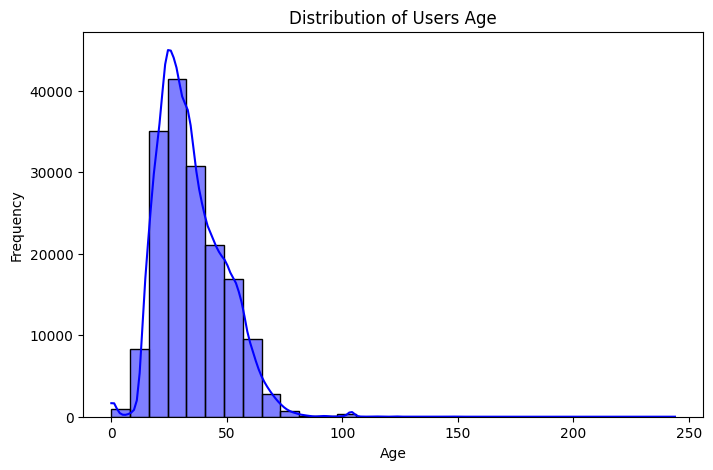

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Users Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
avg_ratings = ratings.groupby("ISBN")['Book-Rating'].mean().sort_values(ascending=False).head(10)
top_avg_books = books[books['ISBN'].isin(avg_ratings.index)][['ISBN','Book-Title','Book-Author']]
top_avg_books = top_avg_books.merge(avg_ratings, on="ISBN").rename(columns={"Book-Rating":"Avg_Rating"})
print("\nTop 10 Books by Average Rating:\n", top_avg_books)


Top 10 Books by Average Rating:
          ISBN                   Book-Title    Book-Author  Avg_Rating
0  055312000X                          Kid   Pete Axthelm        10.0
1  0333782453                   Lost World  Brian Blessed        10.0
2  0553119362  Four Great Plays by Chekhov  Anton Chekhov        10.0


In [3]:
import pandas as pd

# Load CSV files
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)

# -------------------------------
# 1️⃣ Top 10 Most Rated Books
# -------------------------------
top_books = (
    ratings.groupby("ISBN")["Book-Rating"]
    .count()
    .reset_index()
    .rename(columns={"Book-Rating": "Num_Ratings"})
)

top_books = top_books.merge(books[["ISBN", "Book-Title", "Book-Author"]], on="ISBN", how="left")
top_books = top_books.sort_values("Num_Ratings", ascending=False).head(10)

# -------------------------------
# 2️⃣ Top 10 Books by Average Rating
# -------------------------------
avg_ratings = (
    ratings.groupby("ISBN")["Book-Rating"]
    .mean()
    .reset_index()
    .rename(columns={"Book-Rating": "Avg_Rating"})
)

count_ratings = (
    ratings.groupby("ISBN")["Book-Rating"]
    .count()
    .reset_index()
    .rename(columns={"Book-Rating": "Num_Ratings"})
)

rating_stats = avg_ratings.merge(count_ratings, on="ISBN")
rating_stats = rating_stats.merge(books[["ISBN", "Book-Title", "Book-Author"]],
                                  on="ISBN", how="left")

# Filter: at least 50 ratings for meaningful averages
rating_stats = rating_stats[rating_stats["Num_Ratings"] >= 50]

top_avg_books = rating_stats.sort_values("Avg_Rating", ascending=False).head(10)


In [12]:
fig = px.bar(top_avg_books, x="Book-Title", y="Avg_Rating", color="Book-Author",
             title="Top 10 Books by Average Rating", text="Avg_Rating")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Load the datasets
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# Merge the dataframes
merged_df = pd.merge(ratings, books, on='ISBN')


fig = go.Figure(data=[go.Table(
    header=dict(values=list(merged_df.columns),
                fill_color='dark grey',
                font=dict(color='black', size=10),
                align='center'),
    cells=dict(values=[merged_df[col].head(5) for col in merged_df.columns],
               fill_color='light grey',
               align='center'))
])

fig.update_layout(title="Merged Ratings and Books Table (Top 5 Rows)")
fig.show()

**Reasoning**:
The previous command failed because the dataframes were not loaded. I will load the dataframes and then merge them.



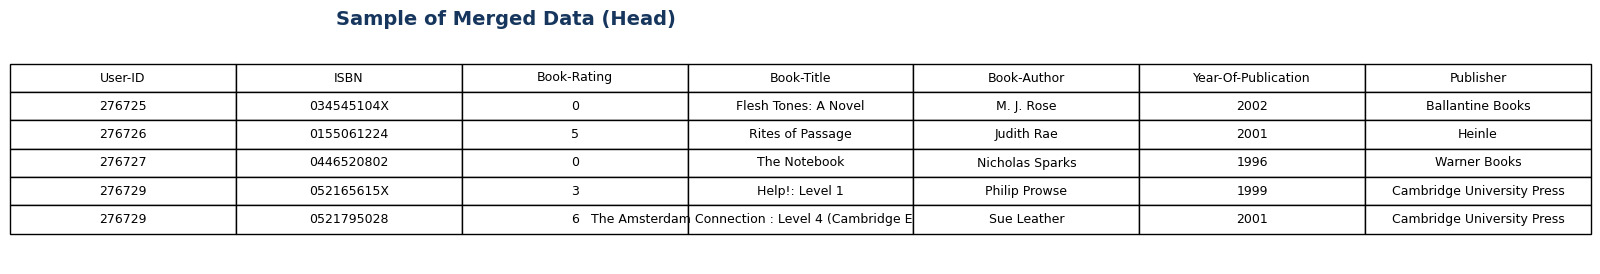

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# Merge
merged_df = pd.merge(ratings, books, on='ISBN')

# Keep only useful columns (drop long URLs)
sample_df = merged_df.head()[[
    "User-ID", "ISBN", "Book-Rating", "Book-Title",
    "Book-Author", "Year-Of-Publication", "Publisher"
]]

# Plot
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis("off")

tbl = ax.table(
    cellText=sample_df.values,
    colLabels=sample_df.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.7, 1.7)

# Caption
plt.title("Sample of Merged Data (Head)", fontsize=14, fontweight="bold", color="#17365D", loc="left")

# Save
plt.savefig("merged_df_head.png", bbox_inches="tight", dpi=300)
plt.show()

## Plot heatmap

### Subtask:
Plot the correlation heatmap using the calculated correlation matrix.


**Reasoning**:
Plot the correlation heatmap using the calculated correlation matrix.



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# 1. Load your dataset (adjust path if needed)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# 2. Keep only numeric columns (Book-Rating is numeric)
numeric_df = ratings.select_dtypes(include=['number'])

# 3. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 4. Plot correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale="Viridis",
    zmin=-1, zmax=1
))
fig.update_layout(title="Correlation Heatmap of Books")
fig.show()

**Reasoning**:
The `corr_matrix` is not defined. I need to recreate the necessary dataframes and calculate the correlation matrix before plotting the heatmap.



In [2]:
import pandas as pd
import plotly.graph_objects as go

# -------------------------------
# 1️⃣ Load CSV Files
# -------------------------------
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)

# -------------------------------
# 2️⃣ Create 'popular_books'
# -------------------------------

# Count ratings per book
rating_count = (
    ratings.groupby("ISBN")["Book-Rating"]
    .count()
    .reset_index()
    .rename(columns={"Book-Rating": "Num_Ratings"})
)

# Average rating per book
rating_mean = (
    ratings.groupby("ISBN")["Book-Rating"]
    .mean()
    .reset_index()
    .rename(columns={"Book-Rating": "Avg_Rating"})
)

# Merge rating stats
popular_books = rating_count.merge(rating_mean, on="ISBN")

# Merge with book details
popular_books = popular_books.merge(
    books[["ISBN", "Book-Title", "Book-Author"]],
    on="ISBN",
    how="left"
)

# Only consider books with at least 50 ratings
popular_books = popular_books[popular_books["Num_Ratings"] >= 50]

# Get Top 10 Most Popular Books
popular_books = popular_books.sort_values("Num_Ratings", ascending=False).head(10)

# -------------------------------
# 3️⃣ Display Table using Plotly
# -------------------------------
fig = go.Figure(data=[go.Table(
    header=dict(values=list(popular_books.columns),
                fill_color='dark grey',
                font=dict(color='Black', size=14),
                align='center'),
    cells=dict(values=[popular_books[col] for col in popular_books.columns],
               fill_color='light grey',
               align='center'))
])

fig.update_layout(width=900, height=600, title="Top 10 Most Popular Books")
fig.show()

In [ ]:
!pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 20.6 MB/s eta 0:00:00


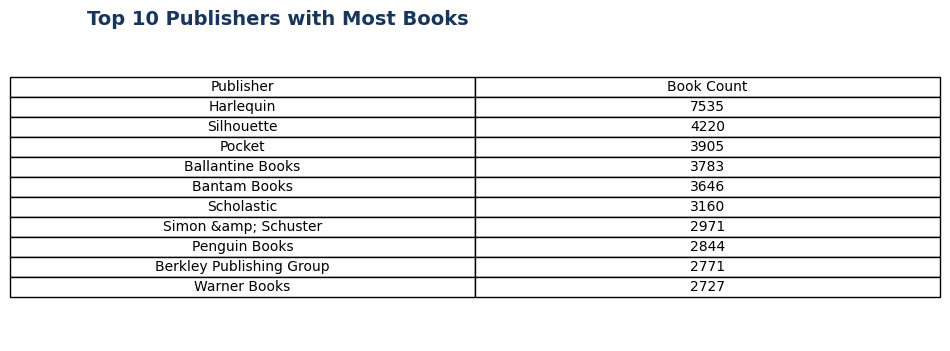

In [ ]:
import matplotlib.pyplot as plt

# Count publishers
top_publishers = books['Publisher'].value_counts().head(10).reset_index()
top_publishers.columns = ['Publisher', 'Book Count']

# Plot table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

tbl = ax.table(
    cellText=top_publishers.values,
    colLabels=top_publishers.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title("Top 10 Publishers with Most Books", fontsize=14, fontweight="bold", color="#17365D", loc="left")
plt.savefig("top_publishers.png", bbox_inches="tight", dpi=300)
plt.show()

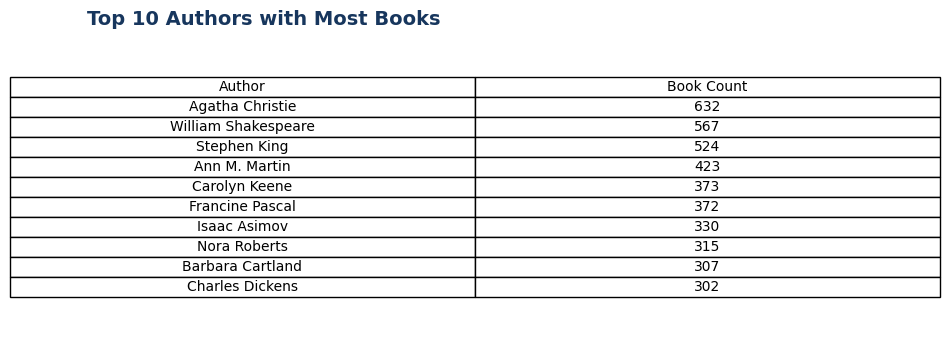

In [ ]:
# Count authors
top_authors = books['Book-Author'].value_counts().head(10).reset_index()
top_authors.columns = ['Author', 'Book Count']

# Plot table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

tbl = ax.table(
    cellText=top_authors.values,
    colLabels=top_authors.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title("Top 10 Authors with Most Books", fontsize=14, fontweight="bold", color="#17365D", loc="left")
plt.savefig("top_authors.png", bbox_inches="tight", dpi=300)
plt.show()

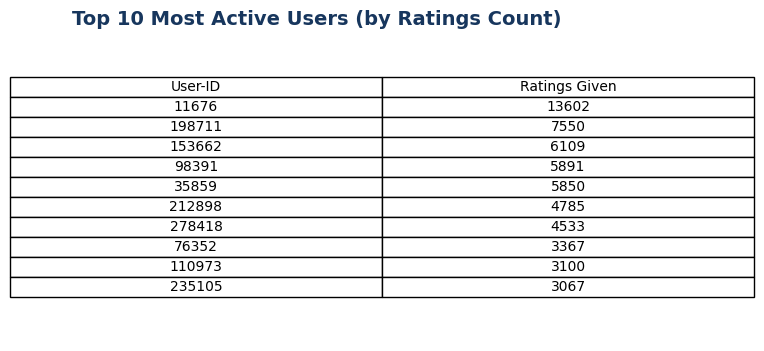

In [ ]:
# Count ratings per user
top_users = ratings['User-ID'].value_counts().head(10).reset_index()
top_users.columns = ['User-ID', 'Ratings Given']

# Plot table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")

tbl = ax.table(
    cellText=top_users.values,
    colLabels=top_users.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title("Top 10 Most Active Users (by Ratings Count)", fontsize=14, fontweight="bold", color="#17365D", loc="left")
plt.savefig("top_users.png", bbox_inches="tight", dpi=300)
plt.show()

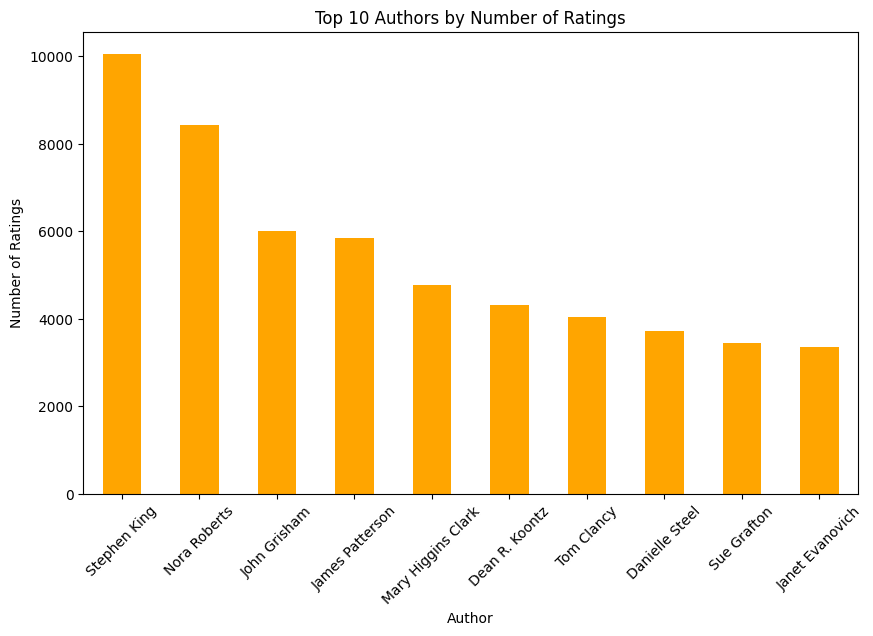

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Load datasets
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# 2. Merge ratings with author information
author_ratings = ratings.merge(books[['ISBN','Book-Author']], on="ISBN")

# 3. Compute top 10 authors by number of ratings
top_authors = author_ratings.groupby("Book-Author")['Book-Rating'].count().sort_values(ascending=False).head(10)

# 4. Static bar chart
plt.figure(figsize=(10,6))
top_authors.plot(kind="bar", color="orange")
plt.title("Top 10 Authors by Number of Ratings")
plt.xlabel("Author")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

# 5. Interactive bar chart
fig = px.bar(top_authors, x=top_authors.index, y=top_authors.values,
             title="Top 10 Authors by Ratings", text=top_authors.values)
fig.show()

/tmp/ipython-input-2628645171.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



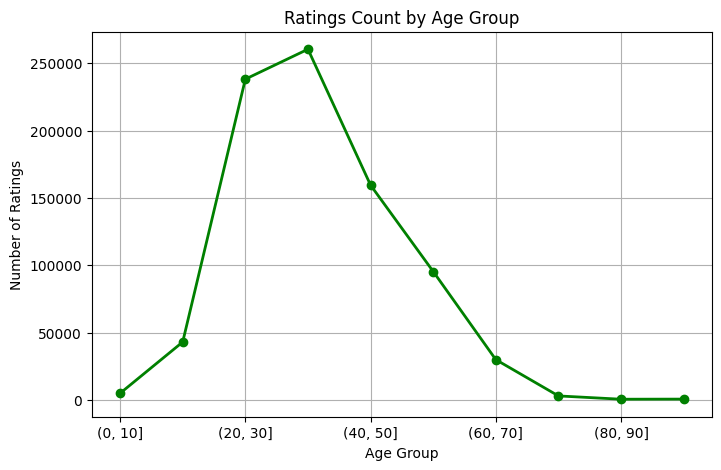

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the datasets
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# Merge ratings with users to get age information
ratings_with_users = ratings.merge(users[['User-ID','Age']], on="User-ID", how="left")

# Group ages into bins and count ratings
agegroup_counts = ratings_with_users.groupby(pd.cut(ratings_with_users['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))['Book-Rating'].count()

# 5. Static line graph (Matplotlib)
plt.figure(figsize=(8,5))
agegroup_counts.plot(kind="line", marker="o", color="green", linewidth=2)
plt.title("Ratings Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()

# 6. Interactive line graph (Plotly)
fig = px.line(x=agegroup_counts.index.astype(str), y=agegroup_counts.values,
              title="Ratings Distribution by Age Group",
              markers=True, labels={'x': 'Age Group', 'y': 'Number of Ratings'})
fig.show()

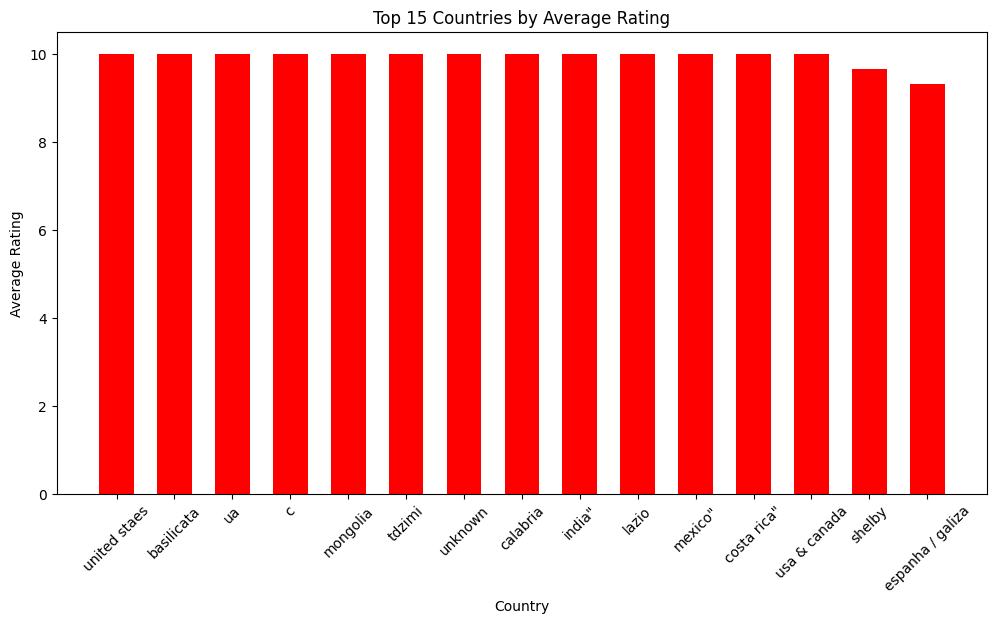

In [ ]:
if 'Location' in users.columns:
    # Extract country (assuming last part of Location is country)
    users['Country'] = users['Location'].apply(lambda x: str(x).split(",")[-1].strip() if pd.notnull(x) else "Unknown")
    ratings_country = ratings.merge(users[['User-ID','Country']], on="User-ID", how="left")

    avg_rating_country = ratings_country.groupby("Country")['Book-Rating'].mean().sort_values(ascending=False).head(15)

    # ----- Static Column Chart (Matplotlib) -----
    plt.figure(figsize=(12,6))
    plt.bar(avg_rating_country.index, avg_rating_country.values, color="red", width=0.6)
    plt.title("Top 15 Countries by Average Rating")
    plt.xlabel("Country")
    plt.ylabel("Average Rating")
    plt.xticks(rotation=45)
    plt.show()

    # ----- Interactive Column Chart (Plotly) -----
    fig = px.bar(x=avg_rating_country.index, y=avg_rating_country.values,
                 title="Top 15 Countries by Avg Rating",
                 labels={'x': 'Country', 'y': 'Average Rating'},
                 text=avg_rating_country.values)
    fig.update_traces(marker_color="red", textposition="outside")
    fig.show()

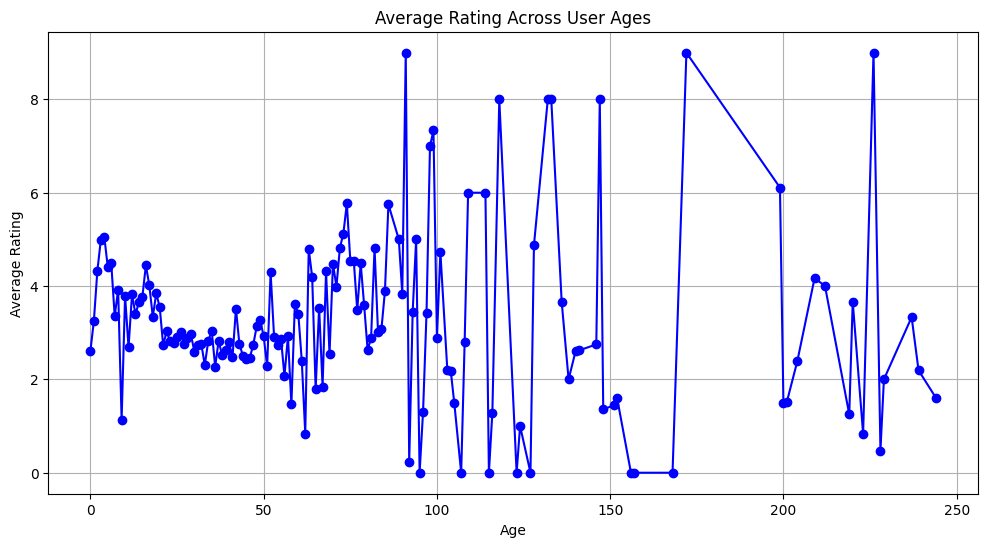

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)

# Merge ratings with users to get age information
ratings_with_users = ratings.merge(users[['User-ID','Age']], on="User-ID", how="left")

# Calculate average rating across user ages
avg_rating_age = ratings_with_users.groupby("Age")['Book-Rating'].mean().dropna()

plt.figure(figsize=(12,6))
plt.plot(avg_rating_age.index, avg_rating_age.values, marker='o', linestyle='-', color="blue")
plt.title("Average Rating Across User Ages")
plt.xlabel("Age")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [ ]:
# 1. Distribution of Ratings
import pandas as pd
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)
ratings_with_books = ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')

ratings_distribution_books = (
    ratings_with_books.groupby(['Book-Title', 'Book-Rating'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(10)
)

print(ratings_distribution_books)

                                             Book-Title  Book-Rating  Count
396551                                      Wild Animus            0   1921
330322                        The Lovely Bones: A Novel            0    588
9111                                    A Painted House            0    472
47393                             Bridget Jones's Diary            0    438
335565                       The Nanny Diaries: A Novel            0    435
89067   Divine Secrets of the Ya-Ya Sisterhood: A Novel            0    417
306959                                The Da Vinci Code            0    404
271021                           Snow Falling on Cedars            0    387
339690                                The Pelican Brief            0    383
348503                          The Secret Life of Bees            0    368


In [ ]:
# 2. Average Rating per User (Top 10)
avg_rating_per_user = ratings.groupby('User-ID')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_per_user)

User-ID
188978    10.0
188963    10.0
112268    10.0
66169     10.0
278698    10.0
66110     10.0
209861    10.0
247175    10.0
66258     10.0
144010    10.0
Name: Book-Rating, dtype: float64


In [ ]:
# 3. Average Rating per Book (Top 10) — using Book Title instead of ISBN
import pandas as pd
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
avg_rating_per_book = (
    ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')
    .groupby('Book-Title')['Book-Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(avg_rating_per_book)

Book-Title
Timelock: How Life Got So Hectic and What You Can Do About It                                                                10.0
Timelines of World History                                                                                                   10.0
Bathroom Game Book                                                                                                           10.0
Rookie Princess (Silhouette Desire, No 483)                                                                                  10.0
Roof World                                                                                                                   10.0
Hinter dem Horizont die Freiheit.                                                                                            10.0
Times Family Atlas of the World                                                                                              10.0
Basset Hounds: Everything About Purchase, Care, Nutrition, Breeding Behavior, a

In [ ]:
# 4. Number of Ratings per Book (Top 10) — using Book Title instead of ISBN
ratings_count_per_book = (
    ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')
    .groupby('Book-Title')['Book-Rating']
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print(ratings_count_per_book)

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Rating, dtype: int64


In [ ]:
# 5. Number of Ratings per User (Top 10)
ratings_count_per_user = ratings['User-ID'].value_counts().head(10)
print(ratings_count_per_user)

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


In [ ]:
# 6. Most Common Years of Publication (Top 10)
top_years = books['Year-Of-Publication'].value_counts().head(10)
print(top_years)

Year-Of-Publication
2002    17627
1999    17431
2001    17359
2000    17232
1998    15766
1997    14890
2003    14358
1996    14030
1995    13546
1994    11796
Name: count, dtype: int64


In [5]:
# 7. Most Common Locations of Users (Top 10)
import pandas as pd
users = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Users.csv", low_memory=False)
top_locations = users['Location'].value_counts().head(10)
print(top_locations)

Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64


In [ ]:
# 8. Age Distribution (Binned with Count and Percentage)
age_distribution = users['Age'].dropna()

# Define age bins
age_bins = pd.cut(age_distribution,
                  bins=[0,10,20,30,40,50,60,70,80,100],
                  right=False,
                  labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-99'])

# Count of users in each bin
age_counts = age_bins.value_counts().sort_index()

# Calculate percentage for each bin
age_percent = (age_counts / age_counts.sum() * 100).round(2)

# Combine both into a table
age_distribution_table = pd.DataFrame({'User Count': age_counts, 'Percentage (%)': age_percent})

print(age_distribution_table)

       User Count  Percentage (%)
Age                              
0-9          1069            0.64
10-19       18894           11.27
20-29       51539           30.73
30-39       41889           24.98
40-49       26700           15.92
50-59       18811           11.22
60-69        6916            4.12
70-79        1644            0.98
80-99         261            0.16


In [ ]:
# 9. Merge Ratings with Users (Sample)
ratings_users_merged = pd.merge(ratings, users, on='User-ID', how='left')
print(ratings_users_merged.head())

   User-ID        ISBN  Book-Rating                       Location   Age
0   276725  034545104X            0              tyler, texas, usa   NaN
1   276726  0155061224            5       seattle, washington, usa   NaN
2   276727  0446520802            0  h, new south wales, australia  16.0
3   276729  052165615X            3           rijeka, n/a, croatia  16.0
4   276729  0521795028            6           rijeka, n/a, croatia  16.0


In [ ]:
# 10. Merge All Three Datasets (Sample)
merged_all = pd.merge(pd.merge(ratings, books, on='ISBN', how='left'), users, on='User-ID', how='left')
print(merged_all.head())

   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1   276726  0155061224            5   
2   276727  0446520802            0   
3   276729  052165615X            3   
4   276729  0521795028            6   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication                   Publisher  \
0                2002            Ballantine Books   
1                2001                      Heinle   
2                1996                Warner Books   
3                1999  Cambridge University Press   
4                2001  Cambridge University Press   

       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

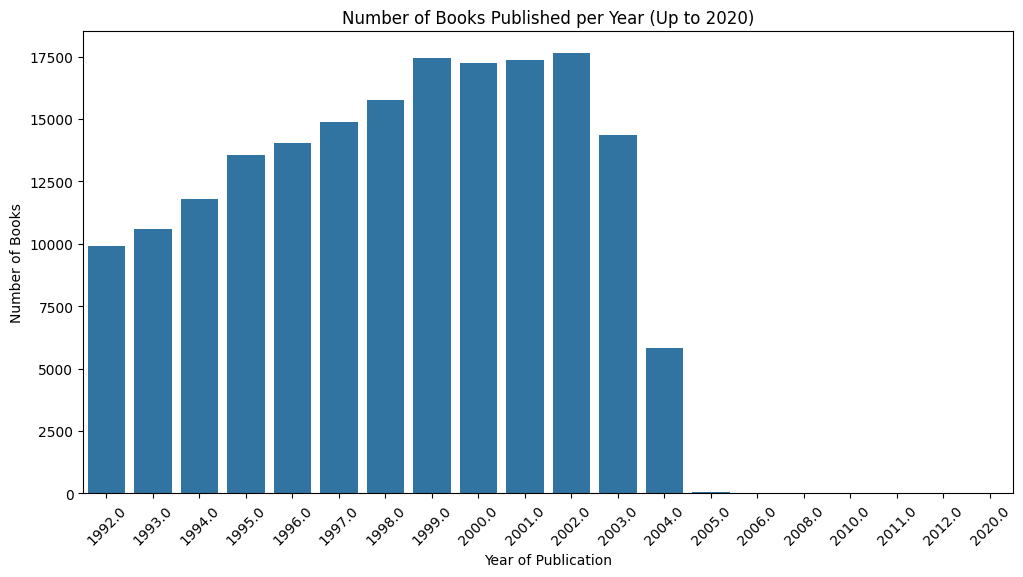

In [ ]:
# 1. Number of Books Published per Year (Top 20 Years) - Filtered up to 2020
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Keep only reasonable years (<= 2020 and >= 1900)
filtered_books = books[(books['Year-Of-Publication'] <= 2020) & (books['Year-Of-Publication'] >= 1900)]

year_counts = filtered_books['Year-Of-Publication'].value_counts().sort_index().tail(20)

plt.figure(figsize=(12,6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Books Published per Year (Up to 2020)")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()

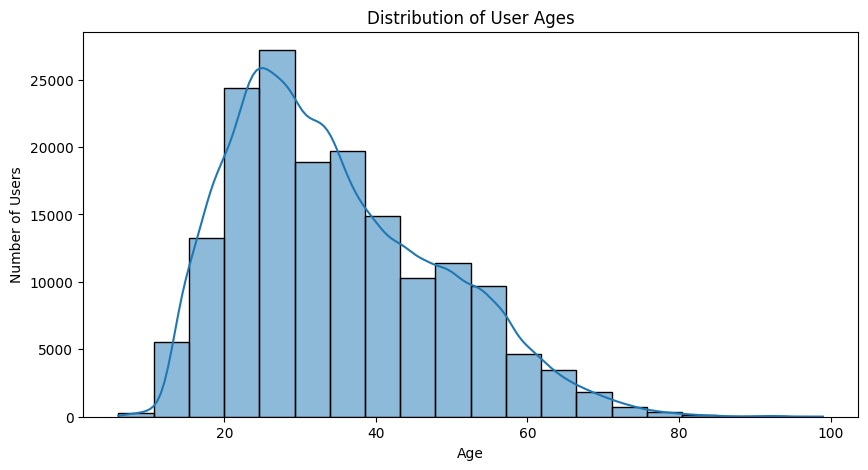

In [ ]:
# 2. Distribution of User Ages (Cleaned)
clean_age = users['Age'].dropna()
clean_age = clean_age[(clean_age > 5) & (clean_age < 100)]
plt.figure(figsize=(10,5))
sns.histplot(clean_age, bins=20, kde=True)
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

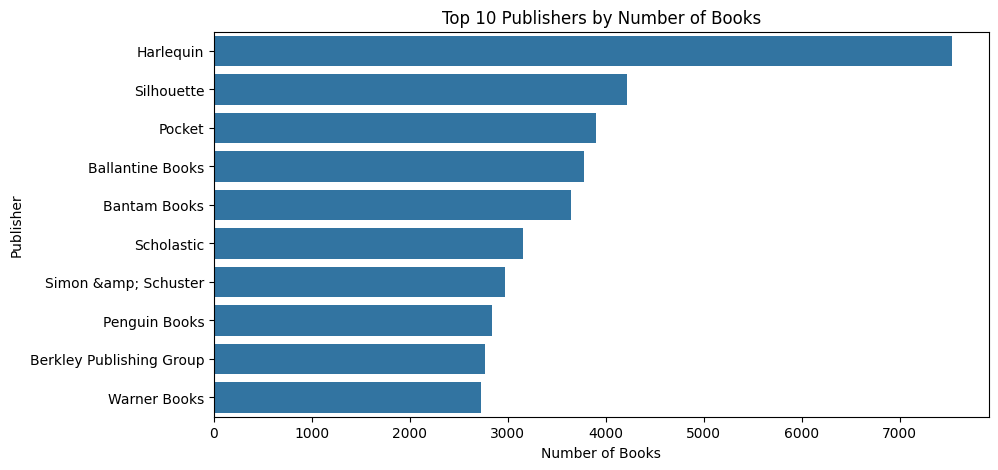

In [ ]:
# 3. Top 10 Publishers by Number of Books
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title("Top 10 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()

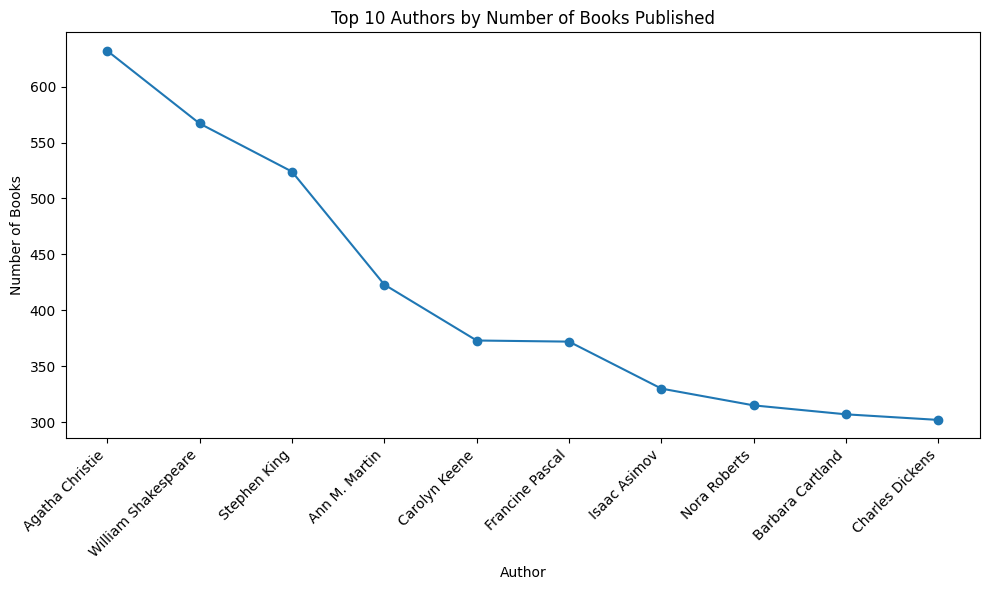

In [ ]:
# 4. Top 10 Authors by Number of Books Published
# top_authors_books = books['Book-Author'].value_counts().head(10)

import matplotlib.pyplot as plt

# --- Start of modified plotting code ---
plt.figure(figsize=(10,6))

# Use plt.plot() for a line graph:
# X-axis: A numerical range (0 to 9) to represent the 10 authors
# Y-axis: The number of books published
plt.plot(range(len(top_authors_books)), top_authors_books.values,
         marker='o', # Add circles at each data point
         linestyle='-') # Connect the points with a line

# Set the X-ticks to be the actual Author names
plt.xticks(ticks=range(len(top_authors_books)),
           labels=top_authors_books.index,
           rotation=45, # Rotate labels for better readability
           ha='right')

plt.title("Top 10 Authors by Number of Books Published")
plt.xlabel("Author")
plt.ylabel("Number of Books")

# Adjust layout to prevent x-axis labels from being cut off
plt.tight_layout()
plt.show()

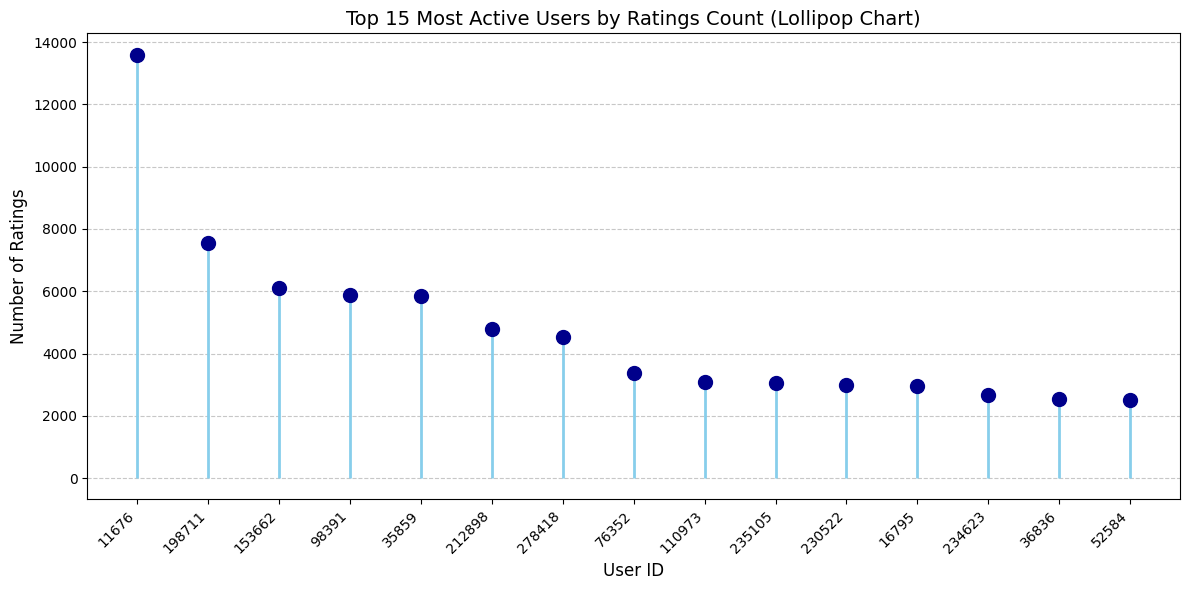

In [ ]:
# 5. Most Active Users by Number of Ratings Given (Top 15)
# most_active_users = ratings['User-ID'].value_counts().head(15)

import matplotlib.pyplot as plt

# --- Start of modified plotting code for Lollipop Chart ---
plt.figure(figsize=(12, 6))

# 1. Create the stem (line) of the lollipop
plt.vlines(x=most_active_users.index.astype(str),
           ymin=0,
           ymax=most_active_users.values,
           color='skyblue',
           linewidth=2)

# 2. Create the head (circle/dot) of the lollipop
plt.scatter(x=most_active_users.index.astype(str),
            y=most_active_users.values,
            color='darkblue',
            s=100, # Size of the circle
            zorder=3) # Ensure dots are on top of the lines

plt.title("Top 15 Most Active Users by Ratings Count (Lollipop Chart)", fontsize=14)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for easier reading of values

plt.tight_layout()
plt.show()

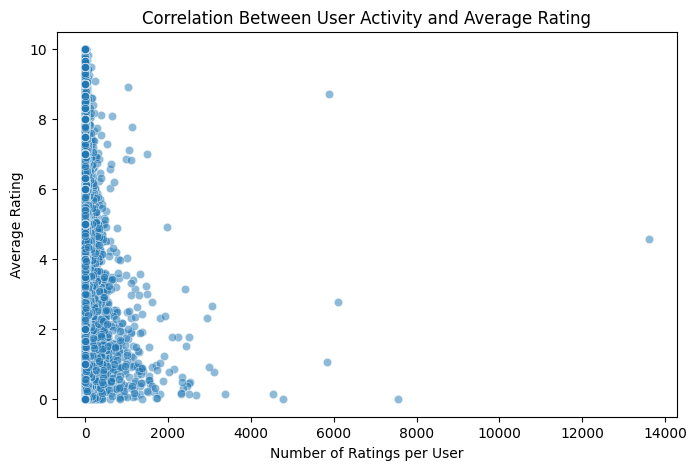

In [ ]:
# 6. Correlation Between Average User Rating and Activity (Ratings Count)
user_rating_stats = ratings.groupby('User-ID')['Book-Rating'].agg(['mean','count'])
plt.figure(figsize=(8,5))
sns.scatterplot(data=user_rating_stats, x='count', y='mean', alpha=0.5)
plt.title("Correlation Between User Activity and Average Rating")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Average Rating")
plt.show()

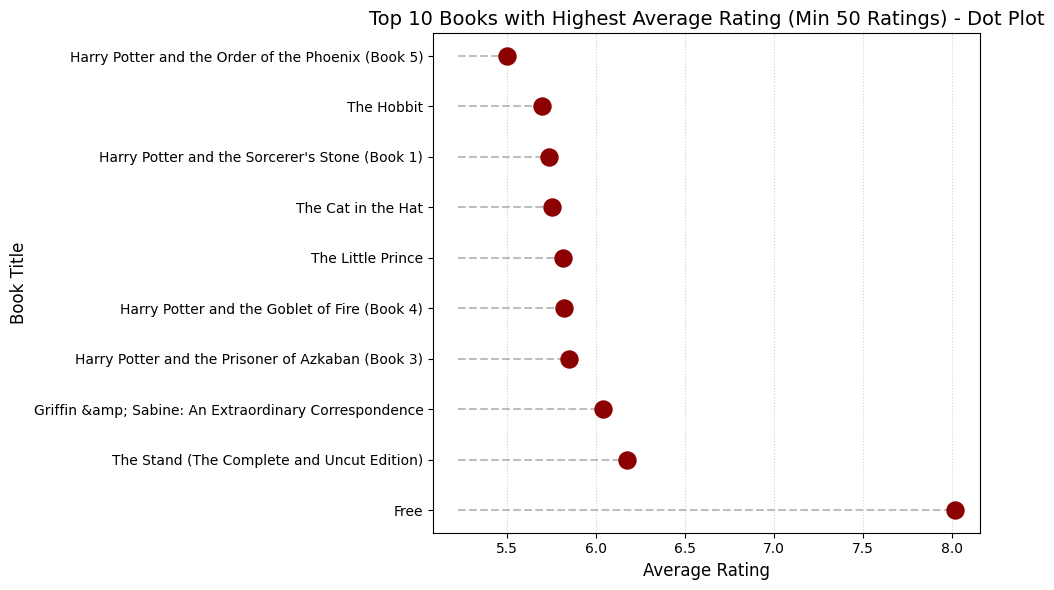

In [ ]:
# 7. Top 10 Books with Highest Average Rating (Min 50 Ratings)
plt.figure(figsize=(10, 6))

# 1. Plot the points (dots)
plt.scatter(x=book_rating_stats['mean'],
            y=book_rating_stats.index,
            color='darkred',
            s=150,  # Size of the dots
            zorder=3)

# 2. Add horizontal lines for better visual connection to the Y-axis
# This helps the reader track the book title to its rating value.
for i in range(len(book_rating_stats)):
    plt.hlines(y=book_rating_stats.index[i],
               xmin=book_rating_stats['mean'].min() * 0.95, # Start line near 0
               xmax=book_rating_stats['mean'].values[i],
               color='gray',
               alpha=0.5,
               linestyle='--')

plt.title("Top 10 Books with Highest Average Rating (Min 50 Ratings) - Dot Plot", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Book Title", fontsize=12)

# Add a vertical grid for easier reading of the values
plt.grid(axis='x', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

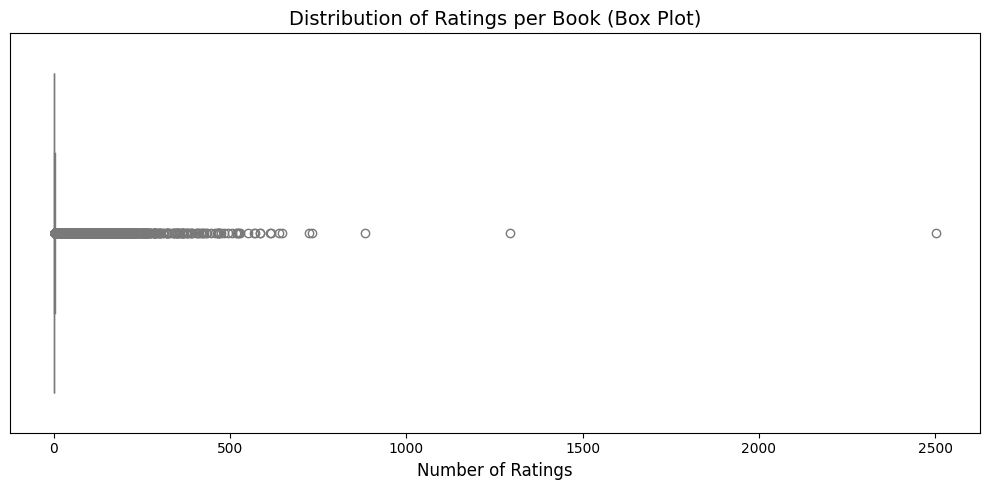

In [ ]:
# 8. Ratings Count Distribution per Book
# NOTE: The data preparation is assumed to have run successfully:
# ratings_per_book = ratings.groupby('ISBN')['Book-Rating'].count()

import matplotlib.pyplot as plt
import seaborn as sns

# --- Start of modified plotting code for Box Plot ---
plt.figure(figsize=(10, 5))

# Use sns.boxplot to plot the distribution
# We use orient='h' to make it horizontal, which often works better for a single distribution
sns.boxplot(x=ratings_per_book, orient='h', color='lightblue')

plt.title("Distribution of Ratings per Book (Box Plot)", fontsize=14)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("") # Y-axis label is usually empty for a single horizontal box plot
plt.yticks([]) # Remove the y-tick labels for a cleaner look

plt.tight_layout()
plt.show()

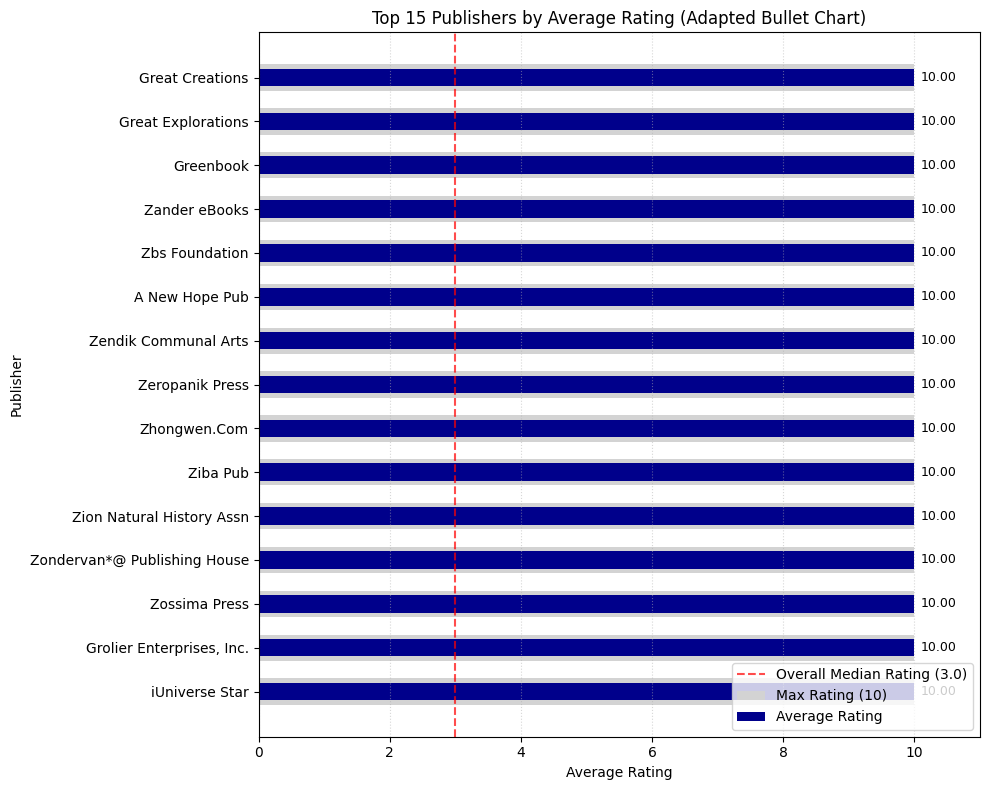

In [ ]:
# 9. Publisher vs Average Book Rating (Top 15 Publishers by Count)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Start of modified plotting code for Adapted Bullet Chart ---

# Convert the Series to a DataFrame for easier handling
df_ratings = publisher_ratings.reset_index()
df_ratings.columns = ['Publisher', 'Average_Rating']

plt.figure(figsize=(10, 8))
ax = plt.gca()

# 1. Define the maximum possible rating for the background bar (target/context)
max_rating = 10

# 2. Draw the background bar (full length to max_rating)
# Use a light color to set the context
ax.barh(df_ratings['Publisher'],
        [max_rating] * len(df_ratings),
        color='lightgray',
        height=0.6,
        label='Max Rating (10)')

# 3. Draw the main performance measure (the Average Rating)
# Use a darker color for the actual data bar
ax.barh(df_ratings['Publisher'],
        df_ratings['Average_Rating'],
        color='darkblue',
        height=0.4,
        label='Average Rating')

# 4. Optional: Add a subtle indicator for the median rating across all books (as a qualitative range)
# Let's assume the overall median rating is around 3 (or calculate from the full ratings data)
# This adds a qualitative performance comparison layer.
median_rating_context = 3.0
ax.axvline(x=median_rating_context, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Overall Median Rating ({median_rating_context})')


# Add the actual rating values as text labels
for i, rating in enumerate(df_ratings['Average_Rating']):
    ax.text(rating + 0.1, i, f'{rating:.2f}',
            va='center',
            fontsize=9,
            color='black')

plt.title("Top 15 Publishers by Average Rating (Adapted Bullet Chart)")
plt.xlabel("Average Rating")
plt.ylabel("Publisher")

# Set x-axis limit slightly past the max rating for visual padding
plt.xlim(0, max_rating + 1)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

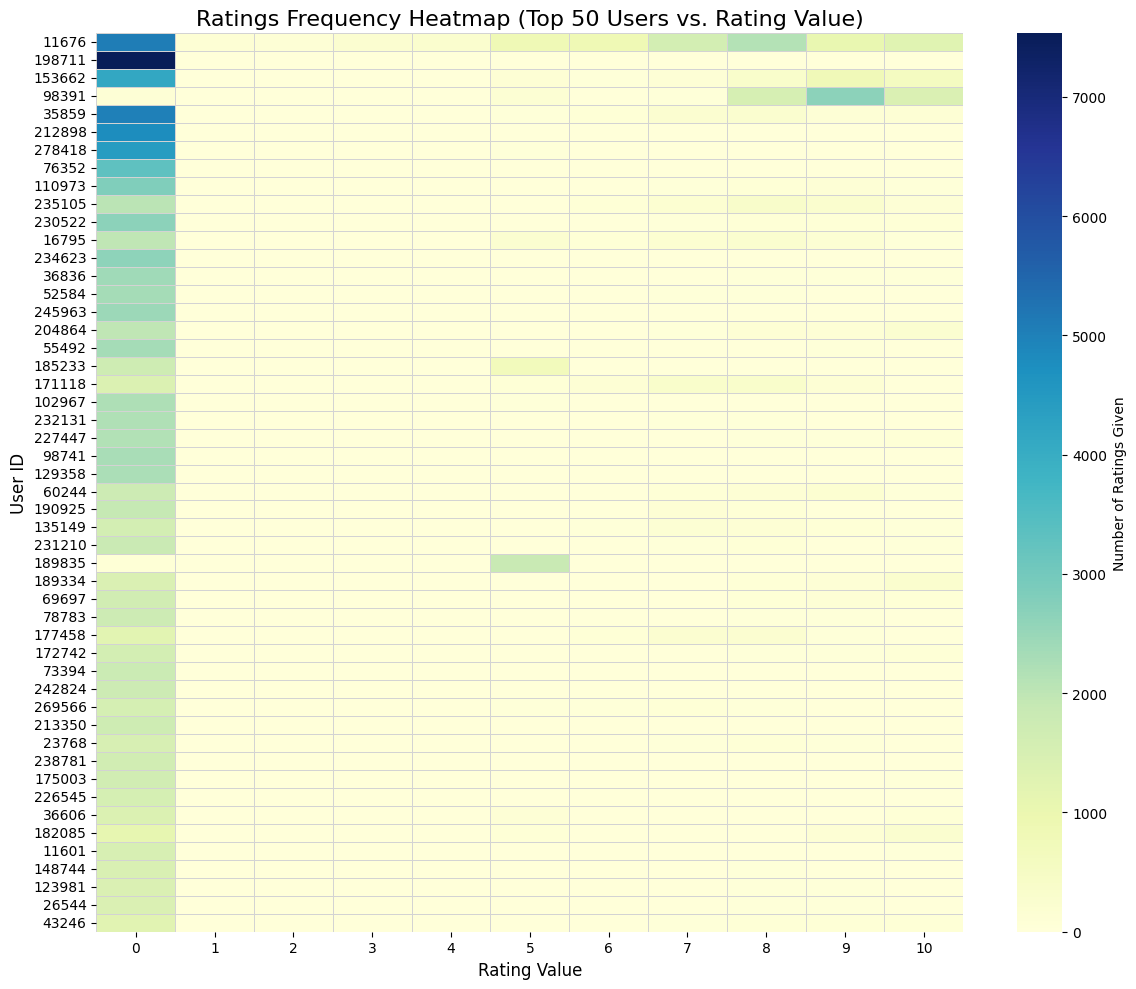

In [ ]:
# 10. Ratings Heatmap (User vs Rating Frequency)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'ratings' DataFrame is available.
# Let's create a dummy 'ratings' DataFrame for demonstration if not provided.
# In a real scenario, 'ratings' would come from your loaded data.
try:
    # Attempt to use the existing 'ratings' if it's defined
    _ = ratings['User-ID'].head()
except NameError:
    # Create a dummy DataFrame for 'ratings' if it doesn't exist
    num_users = 5000
    num_ratings = 100000
    dummy_data = {
        'User-ID': np.random.randint(1, num_users + 1, num_ratings),
        'Book-Rating': np.random.randint(0, 11, num_ratings) # Ratings from 0 to 10
    }
    ratings = pd.DataFrame(dummy_data)


# 1. Identify Top N Most Active Users
N_TOP_USERS = 50 # Let's pick 50 top users for a readable heatmap
top_user_ids = ratings['User-ID'].value_counts().head(N_TOP_USERS).index

# 2. Filter ratings for only these top users
top_user_ratings = ratings[ratings['User-ID'].isin(top_user_ids)]

# 3. Create a pivot table for the heatmap:
#    Rows: User-ID
#    Columns: Book-Rating (0 to 10)
#    Values: Count of how many times that user gave that specific rating
heatmap_data = top_user_ratings.pivot_table(
    index='User-ID',
    columns='Book-Rating',
    values='User-ID', # We're counting occurrences of User-ID
    aggfunc='count'
).fillna(0) # Fill NaN with 0 for users who didn't give certain ratings

# Ensure all rating values from 0-10 are present as columns, filling with 0 if not
all_rating_cols = pd.RangeIndex(start=0, stop=11)
heatmap_data = heatmap_data.reindex(columns=all_rating_cols, fill_value=0)

# Sort users by their total number of ratings to make the heatmap more structured
# (Optional, but often helps visualize patterns)
heatmap_data['Total_Ratings'] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values(by='Total_Ratings', ascending=False).drop(columns=['Total_Ratings'])


plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(heatmap_data,
            cmap='YlGnBu', # A different colormap can be visually appealing
            annot=False, # Set to False for too many cells, or True for a small subset
            fmt='g', # Format for annotation values
            linewidths=.5, # Lines between cells
            linecolor='lightgray',
            cbar_kws={'label': 'Number of Ratings Given'})

plt.title(f"Ratings Frequency Heatmap (Top {N_TOP_USERS} Users vs. Rating Value)", fontsize=16)
plt.xlabel("Rating Value", fontsize=12)
plt.ylabel("User ID", fontsize=12)
plt.yticks(rotation=0) # Keep User-ID labels horizontal for readability

plt.tight_layout()
plt.show()

Model Building

In [7]:
import pandas as pd
import numpy as np

# Load datasets
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Ratings.csv", low_memory=False)

# Create 'POSITIVE'/'NEGATIVE' based on ratings (assuming rating column is 'Book-Rating')
ratings['scoreSentiment'] = ratings['Book-Rating'].apply(lambda x: 'POSITIVE' if x >= 4 else 'NEGATIVE')

# Count positive reviews per book
train_pos = ratings[ratings['scoreSentiment'] == 'POSITIVE']

# Popularity: count positive/negative reviews per book
popularity = ratings.groupby('ISBN')['scoreSentiment'].value_counts().unstack().fillna(0)

if 'POSITIVE' not in popularity.columns:
    popularity['POSITIVE'] = 0
if 'NEGATIVE' not in popularity.columns:
    popularity['NEGATIVE'] = 0

popularity['total_reviews'] = popularity['POSITIVE'] + popularity['NEGATIVE']
popularity['popularity_score'] = popularity['POSITIVE'] / popularity['total_reviews'].replace(0, np.nan)

# Top 10 books based on popularity score
top_books = popularity[popularity['total_reviews'] > 0].sort_values(by='popularity_score', ascending=False).head(10)

# Recommender function
def recommend_popularity(user=None, K=10):
    top_popular_isbns = popularity[popularity['total_reviews'] > 0].sort_values(by='popularity_score', ascending=False).head(K).index.tolist()
    return top_popular_isbns[:K]

# Get recommendations
recs_isbns = recommend_popularity(user=None, K=10)

# Print recommended books
print("\nRecommended books (popularity-based):\n")

title_col = 'Book-Title'
release_col = 'Year-Of-Publication'

recommended_books_details = books[books['ISBN'].isin(recs_isbns)]

for index, row in recommended_books_details.iterrows():
    title = row[title_col] if title_col in row else f"ISBN: {row['ISBN']}"
    release = row[release_col] if release_col in row else 'Unknown Year'
    print(f"- {title} ({release})")

# Handle missing ISBNs
found_isbns = recommended_books_details['ISBN'].tolist()
for isbn in recs_isbns:
    if isbn not in found_isbns:
        print(f"- ISBN: {isbn} (Details not found in books dataset)")


Recommended books (popularity-based):

- South Sea Tales (Modern Library Classics) (2002)
- Babbitt (Modern Library Classics) (2002)
- A Hazard of New Fortunes (Modern Library Classics) (2002)
- The Marble Faun: Or, the Romance of Monte Beni (Modern Library Classics) (2002)
- We Made a Garden (Modern Library Gardening Series.) (2002)
- The Waste Land and Other Writings (Modern Library Classics) (2002)
- Kama Sutra of Vatsyayana (Modern Library Classics) (2002)
- The Civilization of the Renaissance in Italy (Modern Library Classics) (2002)
- Grace: Freeing the Swan Within for a Beautiful Life (1998)
- ISBN: Ô½crosoft (Details not found in books dataset)


In [8]:
# 2. Content-based book recommender (corrected for your CSV)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Load dataset
books = pd.read_csv("C:/Users/Aheesha/Desktop/MCA Projects/Book/CSV Files/Books.csv", low_memory=False)

# Combine relevant text features
def make_content(row):
    parts = []
    for c in ['Book-Title', 'Book-Author', 'Publisher']:  # Use available textual columns
        if c in row and pd.notna(row[c]):
            parts.append(str(row[c]))
    return " ".join(parts)

books['content'] = books.apply(make_content, axis=1)
books_small = books.set_index('ISBN')  # Use ISBN as unique identifier

# TF-IDF
tf = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = tf.fit_transform(books_small['content'].fillna(''))

# Index mappings
book_index = {bid: i for i, bid in enumerate(books_small.index)}
index_book = {i: bid for bid, i in book_index.items()}

# Recommender function with publication year display
def recommend_content(book_isbn, K=10):
    if book_isbn not in book_index:
        print(f"Book with ISBN '{book_isbn}' not found.")
        return []

    idx = book_index[book_isbn]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).ravel()
    top_indices = sim_scores.argsort()[::-1][1:K + 1]  # Skip the book itself

    rec_books = []
    for i in top_indices:
        isbn = index_book[i]
        title = books_small.loc[isbn, 'Book-Title']
        author = books_small.loc[isbn, 'Book-Author']
        year = books_small.loc[isbn, 'Year-Of-Publication']
        rec_books.append((title, author, year))
    return rec_books

# Example: pick a random book
sample_book = np.random.choice(list(book_index.keys()))
sample_title = books_small.loc[sample_book, 'Book-Title']
sample_author = books_small.loc[sample_book, 'Book-Author']
sample_year = books_small.loc[sample_book, 'Year-Of-Publication']

recommended = recommend_content(sample_book, K=10)

print(f"\nBook: {sample_title} by {sample_author} ({sample_year})")
print("\nRecommended books:")
for title, author, year in recommended:
    print(f"- {title} by {author} ({year})")


Book: Cause of Fear by Robert Ross (2004)

Recommended books:
- Third Degree by Ross Kasminoff (1999)
- Deadshot by Robert Tralins (1993)
- Where Darkness Lives by Robert Ross (2002)
- Fear and Trembling by Robert Bloch (1989)
- Don't Close Your Eyes by Robert Ross (2003)
- Spiral of Guilt by Faye Snowden (1999)
- Redemption by Annee Cartier (1997)
- Where's Mommy Now? by Rochelle Krich (1990)
- Mortal Strain by W. H. Watford (2002)
- Beyond a Reasonable Doubt by Toby Marlowe (1997)
